# EDA With Data Visualization


## Objectives

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting library and pyplot gives plotting framework
import seaborn as sns #data visualization based on matplotlib. Provides level interface for pretty graphs.

## Exploratory Data Analysis


In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

df.head(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


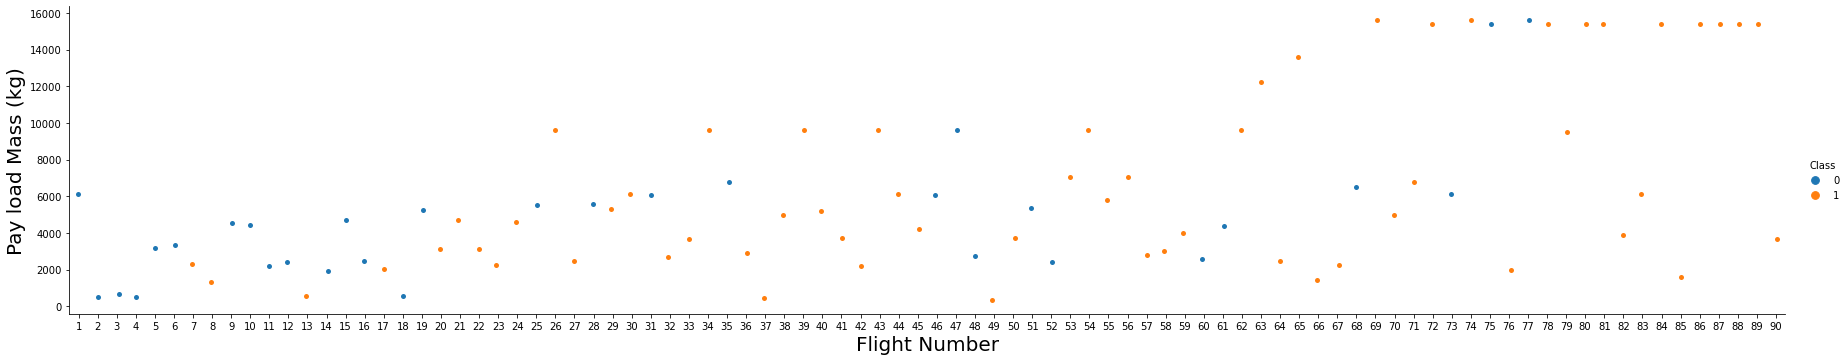

In [4]:
#catplot: Figure-level interface for drawing categorical plots onto a FacetGrid
#Class is whether it was a successful landing or not
sns.catplot(x="FlightNumber", y="PayloadMass", data=df, hue="Class",  aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


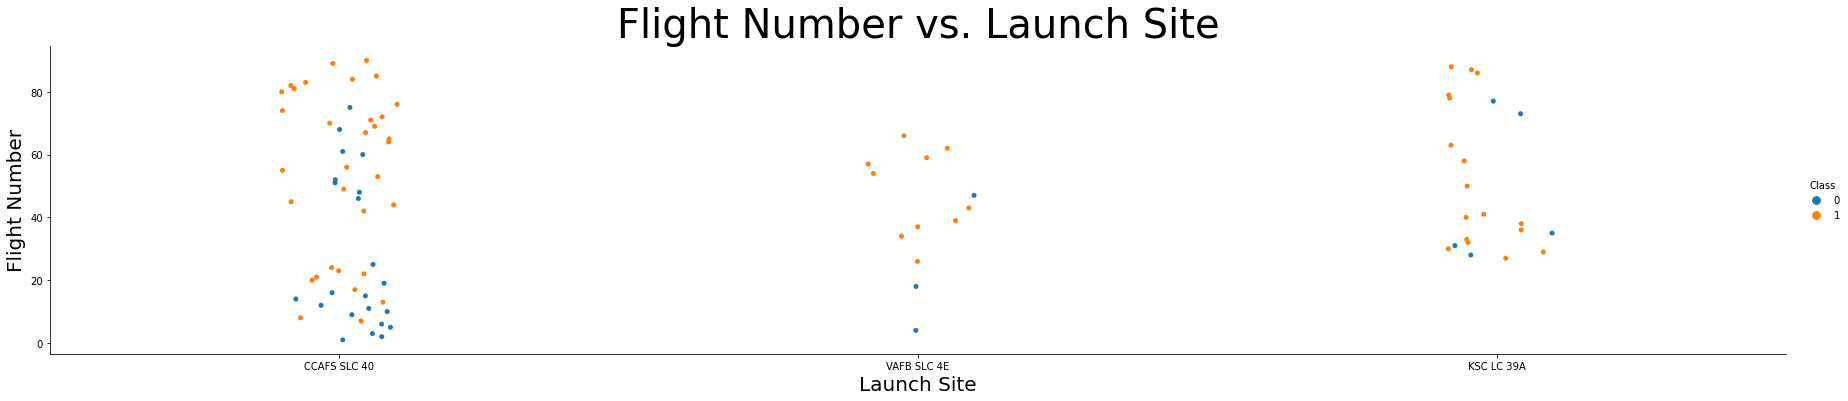

In [6]:
sns.catplot(x="LaunchSite", y="FlightNumber", data=df, hue="Class", aspect=5)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Flight Number",fontsize=20)
plt.title("Flight Number vs. Launch Site", fontsize = 40)
plt.show()

### Visualize the relationship between Payload and Launch Site


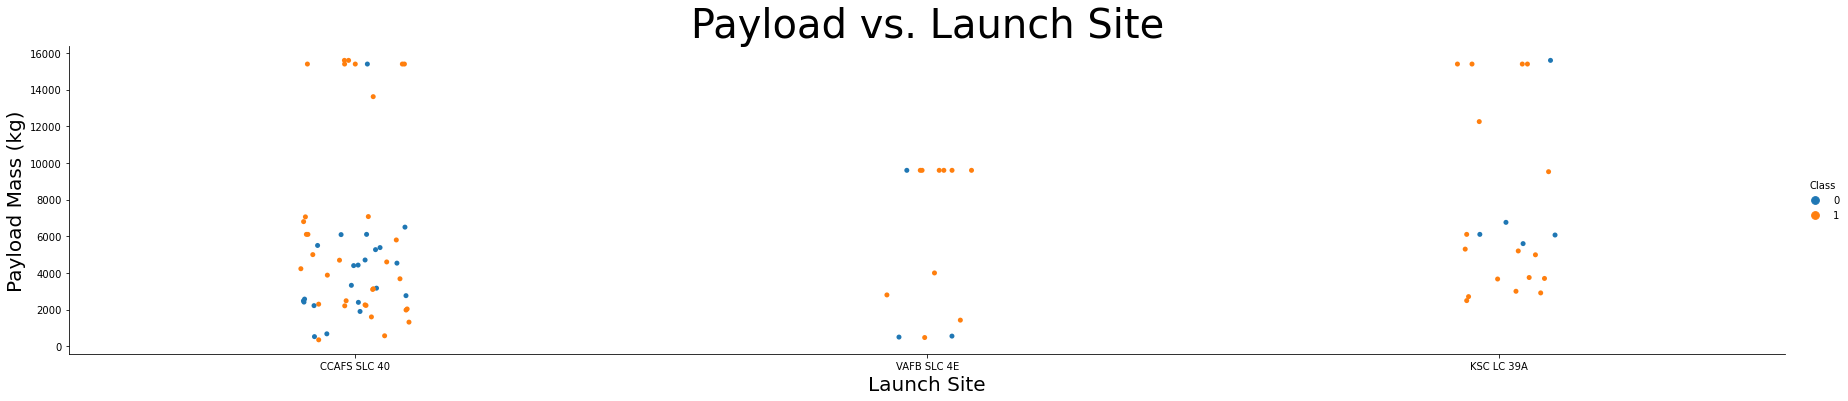

In [7]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x="LaunchSite", y="PayloadMass", data=df, hue="Class", aspect=5) #aspect draws out to wide angle
plt.xlabel("Launch Site", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.title("Payload vs. Launch Site", fontsize = 40)
plt.show()

Heaviest payloads were launched from KSC and CCAFS, and were mostly successful.
Most unsuccessful payloads were at CCAFS and were between 2000-6000kg at CCAFS.

### Visualize the relationship between success rate of each orbit type


Let's create a `bar chart` for the sucess rate of each orbit


In [106]:
#df['Orbit'].value_counts()

df.groupby(['Orbit']).mean()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
Orbit,,,,,,,,,,,
ES-L1,13.000000,570.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-80.577366,28.561857,1.000000
GEO,83.000000,6104.959412,2.000000,1.000000,1.000000,1.000000,5.000000,2.000000,-80.577366,28.561857,1.000000
GTO,35.037037,5011.994444,1.407407,0.629630,0.333333,0.629630,3.037037,0.962963,-80.586229,28.577258,0.518519
HEO,49.000000,350.000000,1.000000,1.000000,0.000000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
ISS,39.142857,3279.938095,1.238095,0.809524,0.238095,0.857143,3.142857,1.285714,-80.583697,28.572857,0.619048
LEO,20.000000,3882.839748,1.000000,0.571429,0.000000,0.714286,2.142857,0.428571,-80.584963,28.575058,0.714286
MEO,77.666667,3987.000000,1.000000,0.666667,0.000000,0.666667,5.000000,0.666667,-80.577366,28.561857,0.666667
PO,36.333333,7583.666667,1.333333,0.888889,0.333333,0.777778,3.222222,1.555556,-120.610829,34.632093,0.666667
SO,73.000000,6104.959412,4.000000,0.000000,1.000000,0.000000,5.000000,3.000000,-80.603956,28.608058,0.000000


Analyze the ploted bar chart try to find which orbits have high sucess rate.


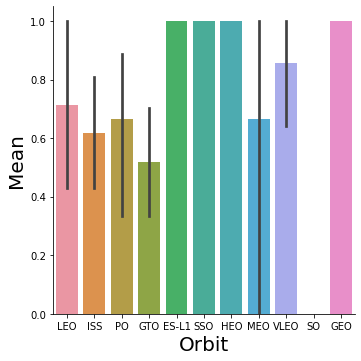

In [12]:
sns.catplot(x="Orbit",y="Class", kind="bar",data=df)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Mean",fontsize=20)
plt.show()

### Visualize the relationship between FlightNumber and Orbit type


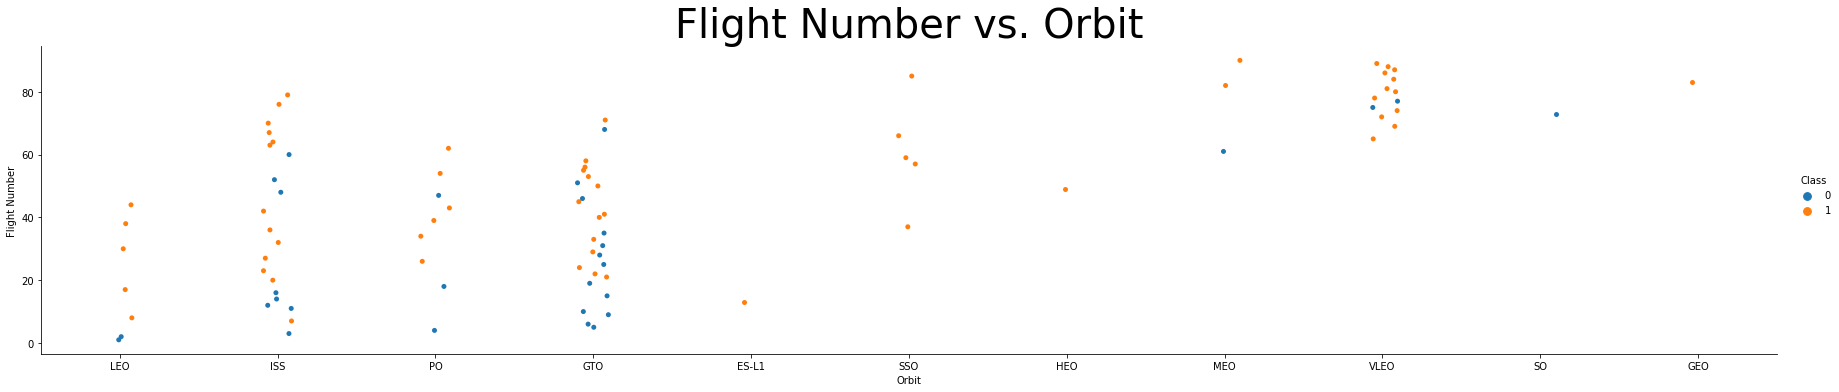

In [10]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="Orbit", y="FlightNumber", data=df, hue="Class", aspect=5)
plt.xlabel("Orbit")
plt.ylabel("Flight Number")
plt.title("Flight Number vs. Orbit", fontsize = 40)
plt.show()

LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

because LEO is evenly spaced

### Visualize the relationship between Payload and Orbit type


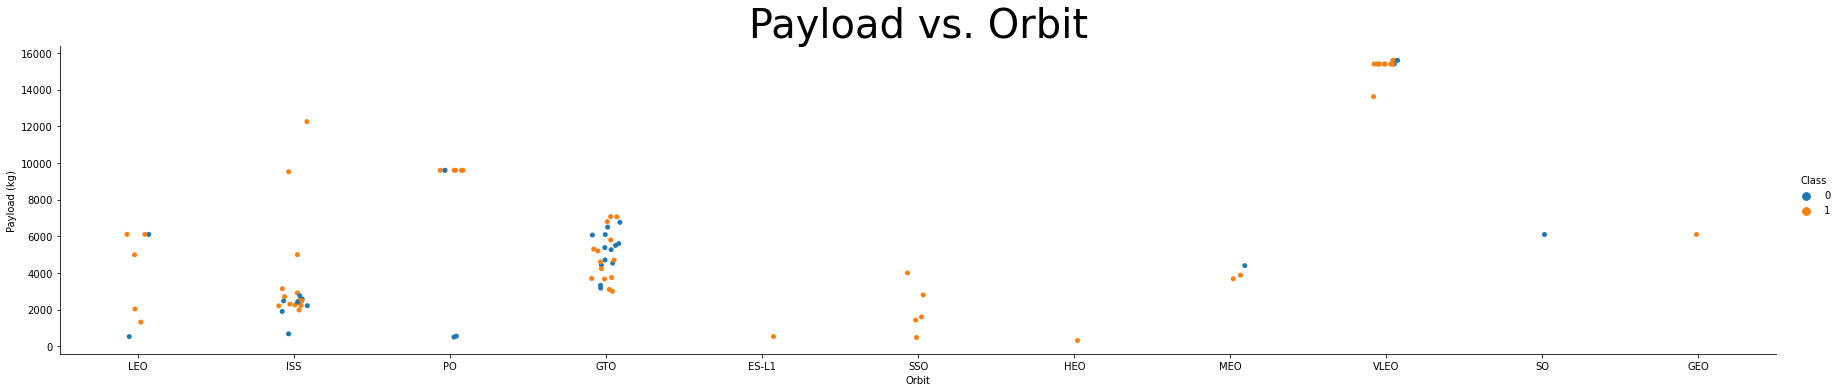

In [16]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="Orbit", y="PayloadMass", data=df, hue="Class", aspect=5)
plt.xlabel("Orbit")
plt.ylabel("Payload (kg)")
plt.title("Payload vs. Orbit", fontsize=40)
plt.show()

You should observe that Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits.


### Visualize the launch success yearly trend


The function will help get the year from the date:


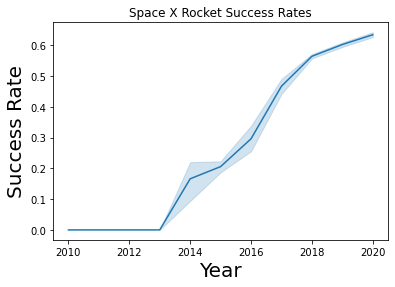

In [105]:
#Create an array of the years
year = pd.DatetimeIndex(df['Date']).year
year = np.array(list(year))


#Initialize variables for successrate calc
successratelist = []
successrate = 0.00
runningcount = 1
data = 0

for x in df['Class']:
    data = x + data
    successrate = data/runningcount
    successratelist.append(successrate)
    runningcount= runningcount +1

#Create an array for successrate
successratelist = np.array(successratelist)
#Turn the two arrays into a dictionary
d = {'successrate':successratelist,'year':year}


sns.lineplot(x="year", y="successrate", data=d)
plt.xlabel("Year",fontsize=20)
plt.title('Space X Rocket Success Rates')
plt.ylabel("Success Rate",fontsize=20)
plt.show()

The sucess rate since 2013 kept increasing till 2020


## Features Engineering


Obtain preliminary insights about how each important variable would affect the success rate. Select the features that will be used in success prediction in the future module.


In [85]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [34]:
features['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [88]:
#features['LaunchSite'].value_counts()

In [87]:
#features['LandingPad'].value_counts()

In [86]:
#features['Serial'].value_counts()

### Encode categoricals to numerical assignments

The following columns need to be converted to numerical equivalents: <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>.

For binary data, we use the function <code>get_dummies</code> to apply OneHotEncoder.

However, since this is not binary, we use <code>LabelEncoder</code> to the feature matrix.

In [91]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [93]:
label_encoder.fit(features['Orbit'])
Orbit_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

features['Orbit'] = label_encoder.fit_transform(features['Orbit'])

Orbit_mapping

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{'ES-L1': 0,
 'GEO': 1,
 'GTO': 2,
 'HEO': 3,
 'ISS': 4,
 'LEO': 5,
 'MEO': 6,
 'PO': 7,
 'SO': 8,
 'SSO': 9,
 'VLEO': 10}

In [94]:
label_encoder.fit(features['LaunchSite'])
LaunchSite_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

features['LaunchSite'] = label_encoder.fit_transform(features['LaunchSite'])

LaunchSite_mapping

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{'CCAFS SLC 40': 0, 'KSC LC 39A': 1, 'VAFB SLC 4E': 2}

In [96]:
label_encoder.fit(features['LandingPad'].astype(str))
LandingPad_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

features['LandingPad'] = label_encoder.fit_transform(features['LandingPad'].astype(str))

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [97]:
label_encoder.fit(features['Serial'].astype(str))
Serial_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

features['Serial'] = label_encoder.fit_transform(features['Serial'])

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Confirm feature matrix was properly encoded and keep track of encodings


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [98]:
#features.drop(columns=['Orbit_d', 'Serial_d', 'LandingPad_d', 'LaunchSite_d'], inplace=True)
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,5,0,1,False,False,False,5,1.0,0,0
1,2,525.000000,5,0,1,False,False,False,5,1.0,0,1
2,3,677.000000,4,0,1,False,False,False,5,1.0,0,2
3,4,500.000000,7,2,1,False,False,False,5,1.0,0,3
4,5,3170.000000,2,0,1,False,False,False,5,1.0,0,4


In [103]:
# Orbit_mapping,Serial_mapping,LandingPad_mapping,LaunchSite_mapping

## Export to CSV


<code>features.to_csv('dataset_part\_3.csv', index=False)</code>
